## Estimativa das emissões do empreendimento

E = Fe x Atv\
E=Emissão\
Fe=Fator de emissão (AP-42)\
Atv=Taxa de atividade (internet/documentos)

## Qual processo emite mais?

Fazer um gráfico de barras no jupyter por processo ou juntar todos os processos como um só 

## Qual época do ano o empreendimento emite mais?

Criar perfil temporal da taxa de atividade de emissões

Procurar as taxas de emissões na AP42 ou na pasta do estudo da empresa do espírito santo que fez inventário de várias empresas e da pra ver alguma similar a minha empresa em estudo

Se alguma máquina tiver vários tipos diferentes com a mesma finalidade, escolher a máquina com maior taxa de emissão

As planilhas do excel salvar como .csv (MS-DOS)\
Salvar o nome de preferência como nome do capítulo da AP42

## Abrir planilha de fatores de emissões compulada

Usei o capítulo xx.x da AP-42 pois meu empreendimento é plástico. (colocar link da AP42 plastico)

import pandas as pd
import os

cwd=os.getcwd()
path=cwd+'\\tabelas\\FE'
print(path)

#indicando nome do arquivo
chapterNumber=11
subChapter=7
file='chp_'+str(chapterNumber)+'_'+str(subChapter)+'.csv'
print(file)

#abrindo arquivo
fe=pd.read_csv(path+'\\'+file)

In [1]:
import pandas as pd
import os

cwd=os.getcwd()
#indicando caminho da pasta
path1=r"C:\Users\supor\OneDrive\Documentos\ControlePoluicaoAtm\ENS5173_202401\venv\Scripts\tabelas\chp_10_2.csv"
print(path1)

#indicando nome do arquivo
chapterNumber=10
subChapter=2

#abrindo arquivo
fe=pd.read_csv(path1, encoding='latin1', delimiter=';')
fe

C:\Users\supor\OneDrive\Documentos\ControlePoluicaoAtm\ENS5173_202401\venv\Scripts\tabelas\chp_10_2.csv


,Fonte,MP,SO2,CO,H2S,"RSH, RSR, RSSR"
0,Digester relief,ND,ND,ND,0.02,0.6
1,Washer,ND,ND,ND,0.01,0.2
2,Evaporator,ND,ND,ND,0.55,0.05
3,Recovery boiler,90,3.5,5.5,6,1.5
4,Noncontact evaporator,115,ND,5.5,0.05,ND
5,Dissolving tank,3.5,0.1,ND,0.1,0.15
6,Lime kiln,28,0.15,0.05,0.25,0.1
7,Turpentine condenser,ND,ND,ND,0.005,0.25
8,Miscellaneous,ND,ND,ND,ND,0.25


O python usa o formato americano de número, . é vírgula e vírgula é ponto, isso dá problema ao puxar o excel, alterar (configuerações, hora e idioma, idioma e região, adicionar idioma ingles --> formato regional alterar pra ingles)\
Isso vai mudar TODAS as planilhas do excel, então fazer o teste no pc normal e depois neste do trabalho onde pode alterar todas as planilhas importantes

Tem que usar os dados da NOSSA empresa, dar um jeito de achar

Na tabela da AP42 de papel kraft, desconsiderar as fontes móveis

In [2]:
#transformando os valores não numéricos em Not a Number
fe['MP']=pd.to_numeric(fe['MP'], errors='coerce')
fe['SO2']=pd.to_numeric(fe['SO2'], errors='coerce')
fe['CO']=pd.to_numeric(fe['CO'], errors='coerce')
fe['H2S']=pd.to_numeric(fe['H2S'], errors='coerce')
fe['RSH, RSR, RSSR']=pd.to_numeric(fe['RSH, RSR, RSSR'], errors='coerce')
fe

,Fonte,MP,SO2,CO,H2S,"RSH, RSR, RSSR"
0,Digester relief,NaN,NaN,NaN,0.020,0.60
1,Washer,NaN,NaN,NaN,0.010,0.20
2,Evaporator,NaN,NaN,NaN,0.550,0.05
3,Recovery boiler,90.0,3.50,5.50,6.000,1.50
4,Noncontact evaporator,115.0,NaN,5.50,0.050,NaN
5,Dissolving tank,3.5,0.10,NaN,0.100,0.15
6,Lime kiln,28.0,0.15,0.05,0.250,0.10
7,Turpentine condenser,NaN,NaN,NaN,0.005,0.25
8,Miscellaneous,NaN,NaN,NaN,NaN,0.25


In [3]:
#fazendo cópia do dataframe fe para utilizar posteriormente
fe2=fe.copy()
fe2

,Fonte,MP,SO2,CO,H2S,"RSH, RSR, RSSR"
0,Digester relief,NaN,NaN,NaN,0.020,0.60
1,Washer,NaN,NaN,NaN,0.010,0.20
2,Evaporator,NaN,NaN,NaN,0.550,0.05
3,Recovery boiler,90.0,3.50,5.50,6.000,1.50
4,Noncontact evaporator,115.0,NaN,5.50,0.050,NaN
5,Dissolving tank,3.5,0.10,NaN,0.100,0.15
6,Lime kiln,28.0,0.15,0.05,0.250,0.10
7,Turpentine condenser,NaN,NaN,NaN,0.005,0.25
8,Miscellaneous,NaN,NaN,NaN,NaN,0.25


In [4]:
#multiplicando as taxas de emissão pela taxa de atividade máxima diária 
atv=265
fe['MP']=fe['MP']*atv
fe['SO2']=fe['SO2']*atv
fe['CO']=fe['CO']*atv
fe['H2S']=fe['H2S']*atv
fe['RSH, RSR, RSSR']=fe['RSH, RSR, RSSR']*atv
print('A soma dos valores da primeira coluna é: '+str(fe['MP'].sum()))
fe

A soma dos valores da primeira coluna é: 62672.5


,Fonte,MP,SO2,CO,H2S,"RSH, RSR, RSSR"
0,Digester relief,NaN,NaN,NaN,5.300,159.00
1,Washer,NaN,NaN,NaN,2.650,53.00
2,Evaporator,NaN,NaN,NaN,145.750,13.25
3,Recovery boiler,23850.0,927.50,1457.50,1590.000,397.50
4,Noncontact evaporator,30475.0,NaN,1457.50,13.250,NaN
5,Dissolving tank,927.5,26.50,NaN,26.500,39.75
6,Lime kiln,7420.0,39.75,13.25,66.250,26.50
7,Turpentine condenser,NaN,NaN,NaN,1.325,66.25
8,Miscellaneous,NaN,NaN,NaN,NaN,66.25


In [5]:
fe2 #confirmando que o fe2 continua inalterado

,Fonte,MP,SO2,CO,H2S,"RSH, RSR, RSSR"
0,Digester relief,NaN,NaN,NaN,0.020,0.60
1,Washer,NaN,NaN,NaN,0.010,0.20
2,Evaporator,NaN,NaN,NaN,0.550,0.05
3,Recovery boiler,90.0,3.50,5.50,6.000,1.50
4,Noncontact evaporator,115.0,NaN,5.50,0.050,NaN
5,Dissolving tank,3.5,0.10,NaN,0.100,0.15
6,Lime kiln,28.0,0.15,0.05,0.250,0.10
7,Turpentine condenser,NaN,NaN,NaN,0.005,0.25
8,Miscellaneous,NaN,NaN,NaN,NaN,0.25


1
2
3
4
5


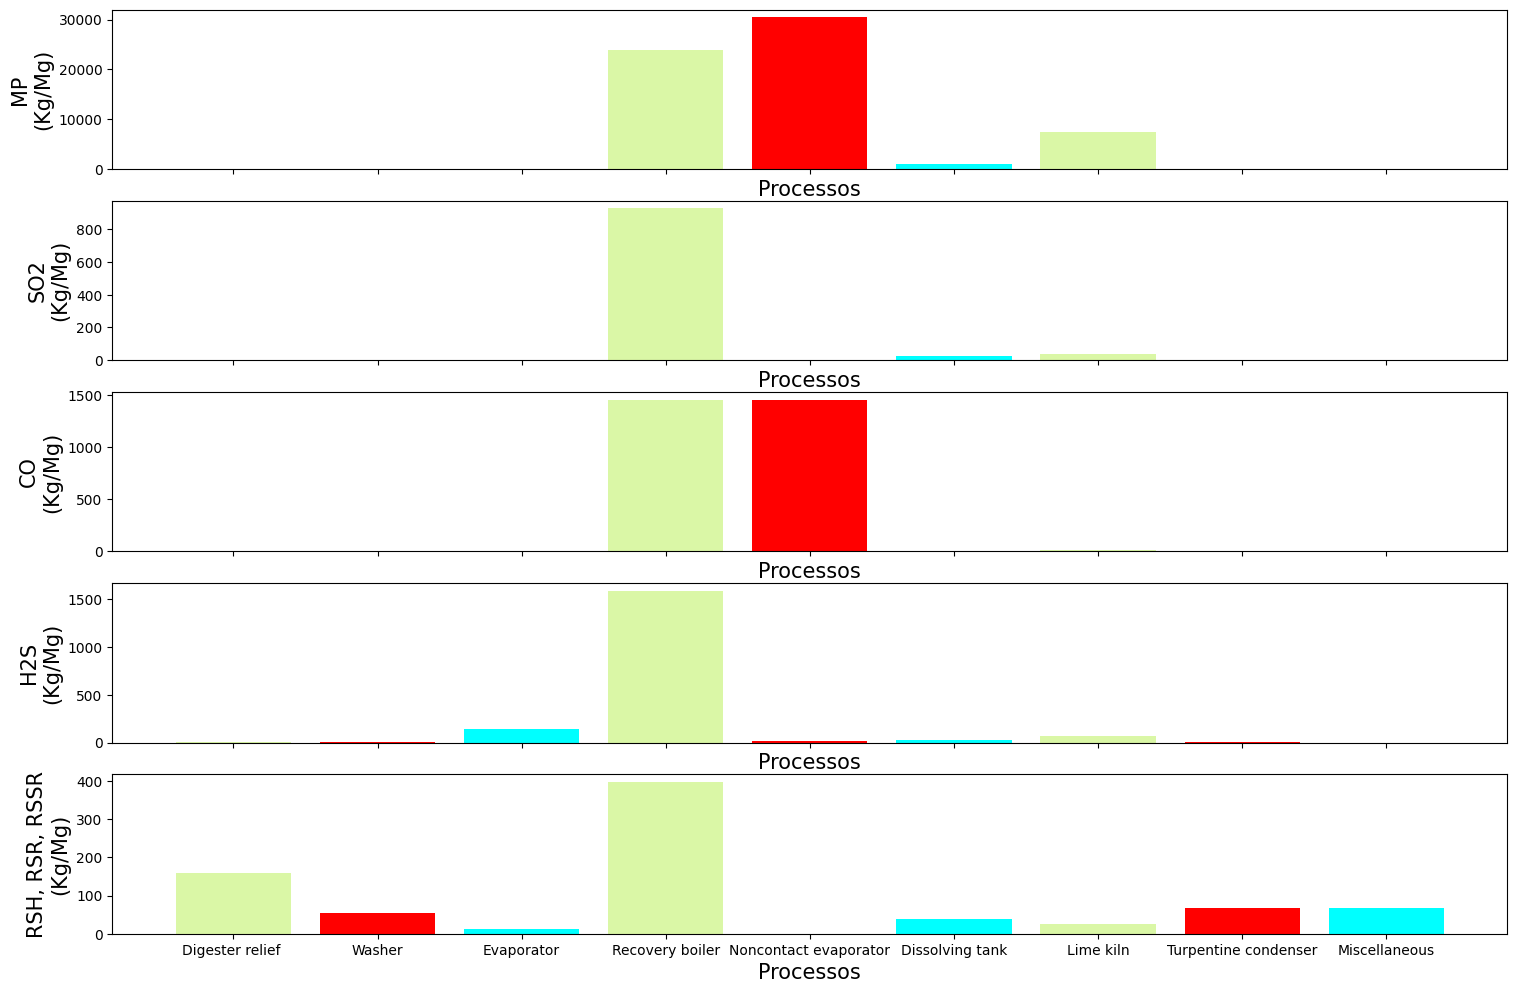

In [6]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(18, 12))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Fonte'],fe.iloc[:,ii],color = ['#DAF7A6','red','cyan'])
    ax[ii-1].set_xlabel('Processos', fontsize=15)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(Kg/Mg)', fontsize=15) 

# Salva a figura na pasta figures - criar a pasta antes!!
fig.savefig(cwd+'\\Figuras\\barplot_fatorEmiss.png')

## Criando um dataframe com as datas em horas

In [7]:
# Criando vetor de datas em hora
import pandas as pd

# Criar um intervalo de datas
datasHora = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')

# Criar um DataFrame com as datas
dfHora = pd.DataFrame({'Data': datasHora})

# Extrair os meses e horas das datas e adicioná-los como uma nova coluna no DataFrame
dfHora['Mes'] = dfHora['Data'].dt.month
dfHora['Horas'] = dfHora['Data'].dt.hour

# Mostrar o DataFrame resultante
dfHora

,Data,Mes,Horas
0,2023-01-01 00:00:00,1,0
1,2023-01-01 01:00:00,1,1
2,2023-01-01 02:00:00,1,2
3,2023-01-01 03:00:00,1,3
4,2023-01-01 04:00:00,1,4
...,...,...,...
8732,2023-12-30 20:00:00,12,20
8733,2023-12-30 21:00:00,12,21
8734,2023-12-30 22:00:00,12,22
8735,2023-12-30 23:00:00,12,23


In [8]:
# Criando vetor de valores máx e min
import numpy as np
atvMax = 265/24 #265 e 150 são os valores diários
atvMin = 150/24
n = dfHora.shape[0]
print(n)
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin


8737


8737


,Data,Mes,Horas,Atividade
0,2023-01-01 00:00:00,1,0,8.165340
1,2023-01-01 01:00:00,1,1,9.619481
2,2023-01-01 02:00:00,1,2,10.740385
3,2023-01-01 03:00:00,1,3,9.400969
4,2023-01-01 04:00:00,1,4,6.735162
...,...,...,...,...
8732,2023-12-30 20:00:00,12,20,9.255806
8733,2023-12-30 21:00:00,12,21,10.581626
8734,2023-12-30 22:00:00,12,22,7.139405
8735,2023-12-30 23:00:00,12,23,8.549882


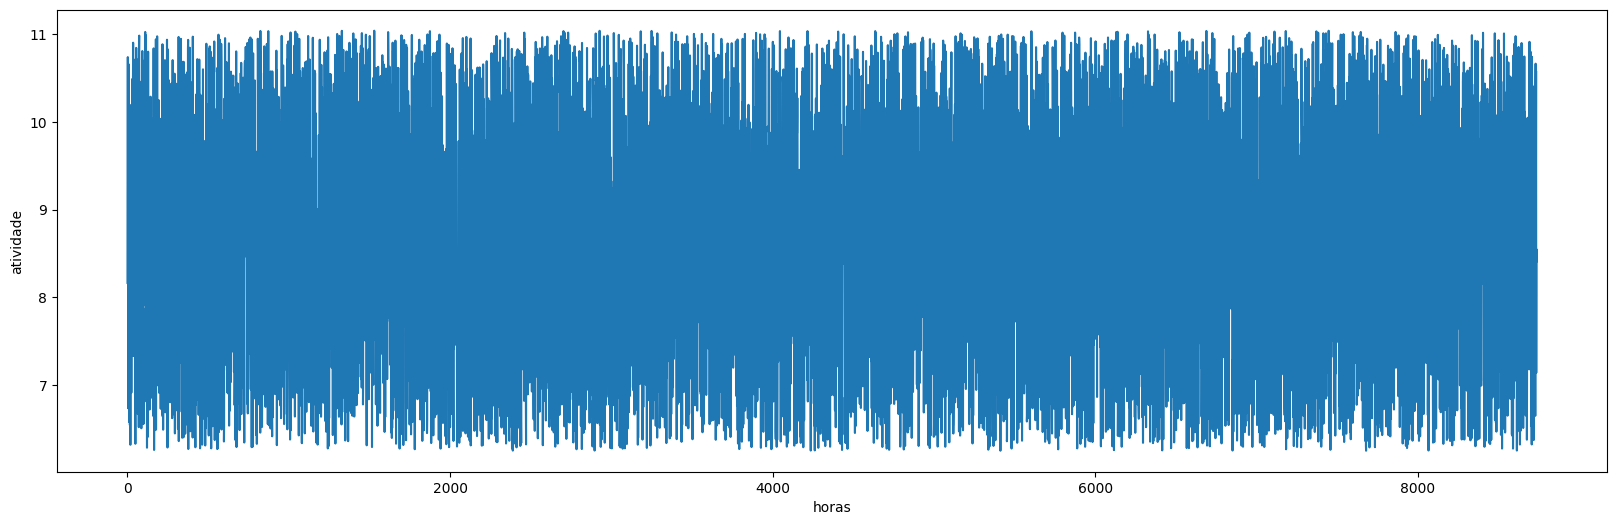

In [9]:
# Criando dataframe com datas e valores de atividade máx e min
import pandas as pd

# Criando coluna de atividade

dfHora['Atividade'] = atv

# Criando uma figura com os valores máx e min
plt.figure(figsize=(20,6))
plt.plot(atv)
plt.xlabel('horas')
plt.ylabel('atividade')
dfHora.to_csv(r"C:\Users\supor\OneDrive\Documentos\ControlePoluicaoAtm\ENS5173_202401\venv\Scripts\tabelas\atividade.csv")
print(n)
dfHora

,Data,Mes,Horas,Atividade,Sazonalidade
0,2023-01-01 00:00:00,1,0,8.165340,0.933013
1,2023-01-01 01:00:00,1,1,9.619481,0.933013
2,2023-01-01 02:00:00,1,2,10.740385,0.933013
3,2023-01-01 03:00:00,1,3,9.400969,0.933013
4,2023-01-01 04:00:00,1,4,6.735162,0.933013
...,...,...,...,...,...
8732,2023-12-30 20:00:00,12,20,9.255806,1.000000
8733,2023-12-30 21:00:00,12,21,10.581626,1.000000
8734,2023-12-30 22:00:00,12,22,7.139405,1.000000
8735,2023-12-30 23:00:00,12,23,8.549882,1.000000


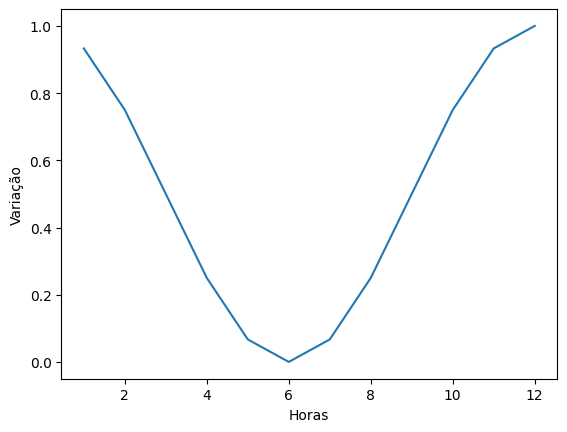

In [10]:
# Criando componente sazonal

sazonalidade = 0.5*(np.cos((2*np.pi)*dfHora['Mes']/12)+1)
plt.xlabel('Horas')
plt.ylabel('Variação')
plt.plot(dfHora['Mes'], sazonalidade)
dfHora['Sazonalidade'] = sazonalidade 
dfHora.to_csv(r"C:\Users\supor\OneDrive\Documentos\ControlePoluicaoAtm\ENS5173_202401\venv\Scripts\tabelas\atividade.csv")
dfHora

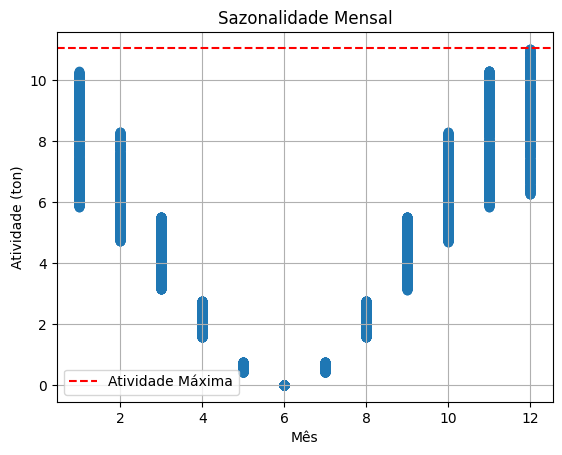

In [11]:
# Valores de atividade máx e mín com sazonalidade mensal

dfHora['AtivSazonal'] = dfHora['Atividade'] * dfHora['Sazonalidade'] #Inserindo a variável nova no dataframe
plt.scatter(dfHora['Mes'], dfHora['AtivSazonal'])
plt.xlabel('Mês')
plt.ylabel('Atividade (ton)')
plt.axhline(y=atvMax, color='r', linestyle='--', label='Atividade Máxima')
plt.legend()
plt.title('Sazonalidade Mensal')
plt.grid()

#df.to_csv(r"C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\tabelas\ativ.csv")
#fig.savefig(cwd+'\\Figuras\\Atividade_Sazonal.png')

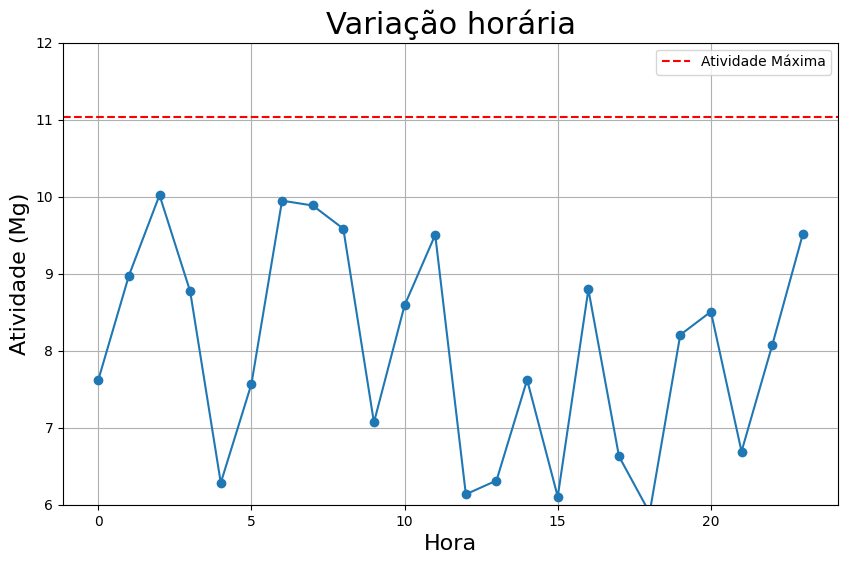

In [12]:
# Valores de atividade máx e mín com sazonalidade horária

plt.figure(figsize=(10,6))
plt.ylim(6,12)
plt.axhline(y=atvMax, color='r', linestyle='--', label='Atividade Máxima')
plt.legend()
plt.title('Variação horária', size=22)
plt.xlabel('Hora',size=16)
plt.ylabel('Atividade (Mg)',size=16)
plt.grid()
plt.plot(dfHora['Horas'].iloc[:24], dfHora['AtivSazonal'].iloc[:24], marker='o')
plt.show()
#dfHora

## 4-Estimando emissões

In [13]:
fe2

,Fonte,MP,SO2,CO,H2S,"RSH, RSR, RSSR"
0,Digester relief,NaN,NaN,NaN,0.020,0.60
1,Washer,NaN,NaN,NaN,0.010,0.20
2,Evaporator,NaN,NaN,NaN,0.550,0.05
3,Recovery boiler,90.0,3.50,5.50,6.000,1.50
4,Noncontact evaporator,115.0,NaN,5.50,0.050,NaN
5,Dissolving tank,3.5,0.10,NaN,0.100,0.15
6,Lime kiln,28.0,0.15,0.05,0.250,0.10
7,Turpentine condenser,NaN,NaN,NaN,0.005,0.25
8,Miscellaneous,NaN,NaN,NaN,NaN,0.25


In [14]:
dfHora

,Data,Mes,Horas,Atividade,Sazonalidade,AtivSazonal
0,2023-01-01 00:00:00,1,0,8.165340,0.933013,7.618366
1,2023-01-01 01:00:00,1,1,9.619481,0.933013,8.975098
2,2023-01-01 02:00:00,1,2,10.740385,0.933013,10.020916
3,2023-01-01 03:00:00,1,3,9.400969,0.933013,8.771223
4,2023-01-01 04:00:00,1,4,6.735162,0.933013,6.283992
...,...,...,...,...,...,...
8732,2023-12-30 20:00:00,12,20,9.255806,1.000000,9.255806
8733,2023-12-30 21:00:00,12,21,10.581626,1.000000,10.581626
8734,2023-12-30 22:00:00,12,22,7.139405,1.000000,7.139405
8735,2023-12-30 23:00:00,12,23,8.549882,1.000000,8.549882


In [15]:
ValorAnual=dfHora['AtivSazonal'].sum()
print(ValorAnual, 'Ton produzidos em um ano')


37545.33827778465 Ton produzidos em um ano


In [16]:
#multiplicando as taxas de emissão pela produtividade anual

fe2['MP']=fe2['MP']*ValorAnual
fe2['SO2']=fe2['SO2']*ValorAnual
fe2['CO']=fe2['CO']*ValorAnual
fe2['H2S']=fe2['H2S']*ValorAnual
fe2['RSH, RSR, RSSR']=fe['RSH, RSR, RSSR']*ValorAnual
fe2

,Fonte,MP,SO2,CO,H2S,"RSH, RSR, RSSR"
0,Digester relief,NaN,NaN,NaN,750.906766,5.969709e+06
1,Washer,NaN,NaN,NaN,375.453383,1.989903e+06
2,Evaporator,NaN,NaN,NaN,20649.936053,4.974757e+05
3,Recovery boiler,3.379080e+06,131408.683972,206499.360528,225272.029667,1.492427e+07
4,Noncontact evaporator,4.317714e+06,NaN,206499.360528,1877.266914,NaN
5,Dissolving tank,1.314087e+05,3754.533828,NaN,3754.533828,1.492427e+06
6,Lime kiln,1.051269e+06,5631.800742,1877.266914,9386.334569,9.949515e+05
7,Turpentine condenser,NaN,NaN,NaN,187.726691,2.487379e+06
8,Miscellaneous,NaN,NaN,NaN,NaN,2.487379e+06


1
2
3
4
5


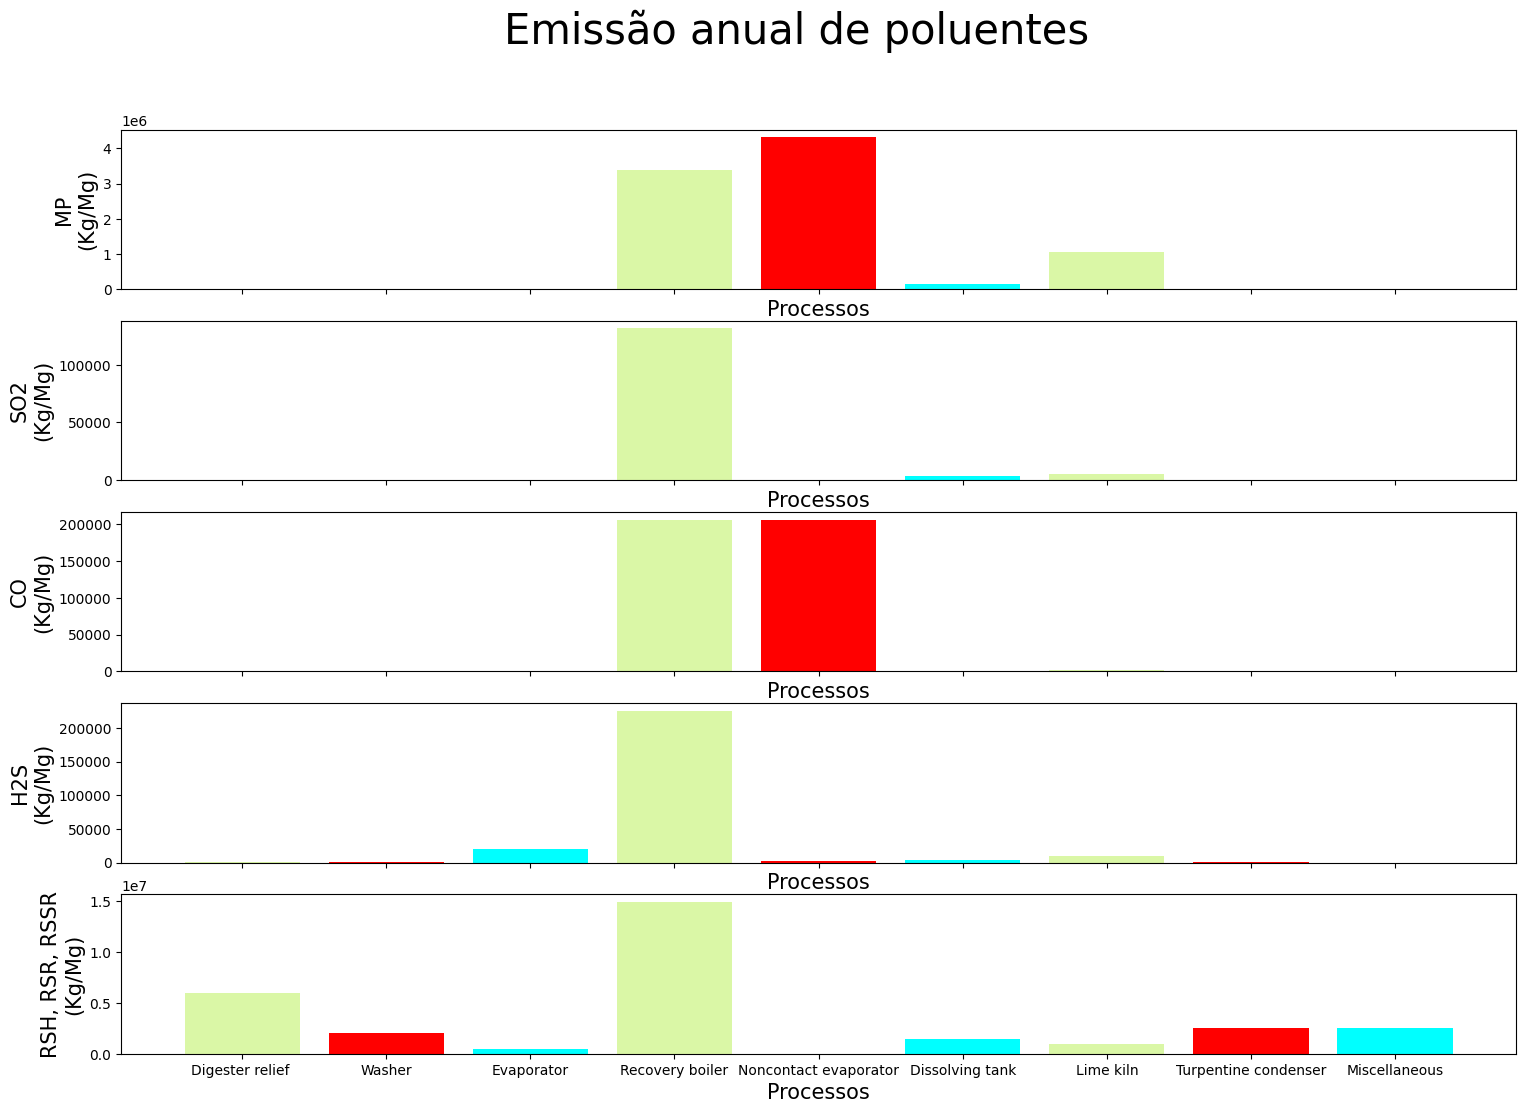

In [17]:
# Plotando os valores de emissão anuais
import matplotlib.pyplot as plt

fig,ax = plt.subplots(len(fe2.columns)-1,1,sharex = True,figsize=(18, 12))
fig.suptitle('Emissão anual de poluentes', fontsize=30)
for ii in range(1,len(fe2.columns)):
    print(ii)
    ax[ii-1].bar(fe2['Fonte'],fe2.iloc[:,ii],color = ['#DAF7A6','red','cyan'])
    ax[ii-1].set_xlabel('Processos', fontsize=15)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(Kg/Mg)', fontsize=15) 

#fig.savefig(cwd+'\\Figuras\\barplot_fatorEmiss.png')

## 6-Qual é o processo que possui maior emissão?

O tanque de recuperação pode ser visto tantos através dos números como dos gráficos como o processo que mais emite poluentes.

## Soma das emissões considerando todos os processos:

In [23]:
fe2

,Fonte,MP,SO2,CO,H2S,"RSH, RSR, RSSR"
0,Digester relief,NaN,NaN,NaN,750.906766,5.969709e+06
1,Washer,NaN,NaN,NaN,375.453383,1.989903e+06
2,Evaporator,NaN,NaN,NaN,20649.936053,4.974757e+05
3,Recovery boiler,3.379080e+06,131408.683972,206499.360528,225272.029667,1.492427e+07
4,Noncontact evaporator,4.317714e+06,NaN,206499.360528,1877.266914,NaN
5,Dissolving tank,1.314087e+05,3754.533828,NaN,3754.533828,1.492427e+06
6,Lime kiln,1.051269e+06,5631.800742,1877.266914,9386.334569,9.949515e+05
7,Turpentine condenser,NaN,NaN,NaN,187.726691,2.487379e+06
8,Miscellaneous,NaN,NaN,NaN,NaN,2.487379e+06


In [ ]:
MP=
SO2=
CO=
H2S=
RSH=
print('Soma emissão MP: 